In [1]:
import pandas as pd
import onsetsync

### Load Data

In [2]:
filepath = 'CSS_Song2.csv'
CSS_Song2 = pd.read_csv(filepath)
#print(CSS_Song2.head())

### Read Data

In [3]:
columns = ['Piece', 'Section','Clave','Bass','Guitar','Tres', 'SD', 'Cycle', 'Isochronous.SD.Time']
df = CSS_Song2[columns]
print(df.head())

    Piece Section  Clave      Bass    Guitar      Tres  SD  Cycle  \
0  Song_2     Son    NaN       NaN       NaN       NaN   1      1   
1  Song_2     Son    NaN       NaN  5.281932       NaN   2      1   
2  Song_2     Son    NaN       NaN  5.480643       NaN   3      1   
3  Song_2     Son    NaN  5.714555  5.707537  5.730943   4      1   
4  Song_2     Son    NaN  5.927078  5.939071  5.917083   5      1   

   Isochronous.SD.Time  
0             5.037333  
1             5.260062  
2             5.482792  
3             5.705521  
4             5.928250  


### Summarise Onsets

In [5]:
summary = onsetsync.summarise_onsets(df=df, instr=['Clave','Bass','Guitar','Tres','Isochronous.SD.Time'], plot=False)
summary.round(2)

,N,Md,M,SD,Min,Max
Clave,486,666.42,703.59,173.73,191.96,1558.09
Bass,486,471.40,708.13,431.53,179.95,1985.18
Guitar,1401,223.62,244.52,91.41,175.07,1694.93
Tres,906,244.97,371.38,234.44,147.12,1986.46
Isochronous.SD.Time,1567,220.38,220.08,2.93,212.81,226.59


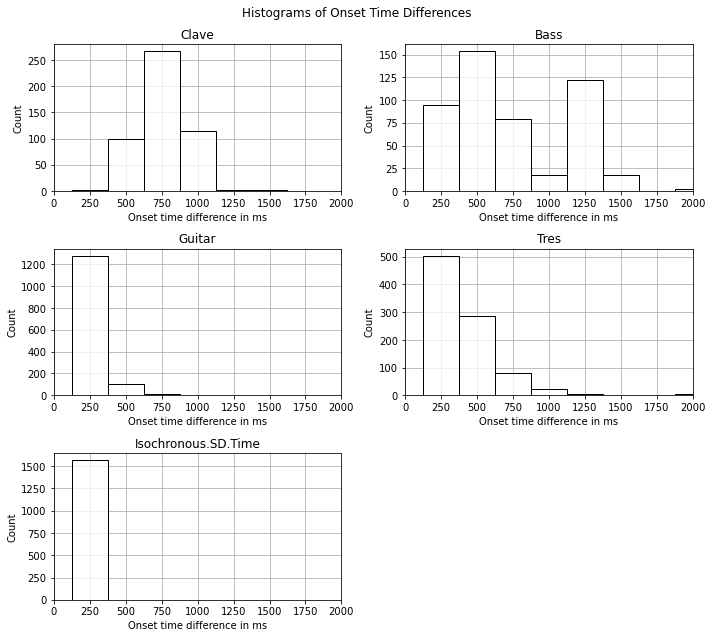

In [6]:
summary = onsetsync.summarise_onsets(df=df, instr=['Clave','Bass','Guitar','Tres','Isochronous.SD.Time'], plot=True)

### Analysis of Synchrony

#### Fig 1

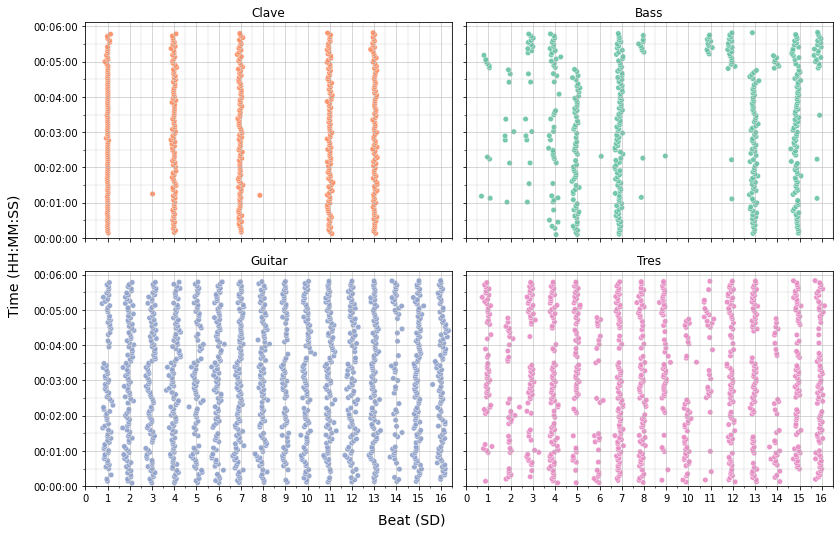

In [7]:
instr=['Clave','Bass','Guitar','Tres']
beat = 'SD'
virtual = 'Isochronous.SD.Time'

onsetsync.plot_by_beat(df=df, instr=instr, beat=beat, virtual=virtual, pcols=2, griddeviations=False, boxplot=False, colour='lightblue', colourpalette='Set2', pointsize=2.5)


#### Fig 2

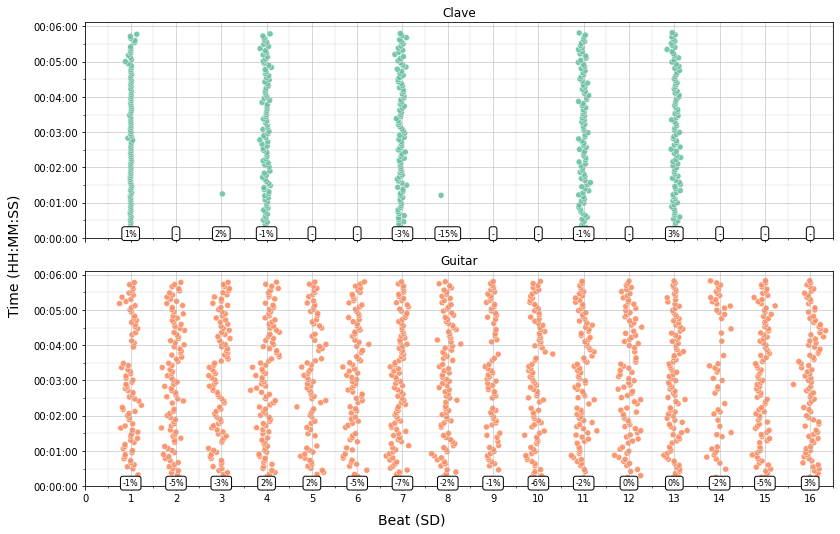

In [8]:
instr=['Clave','Guitar']
beat = 'SD'
virtual = 'Isochronous.SD.Time'

onsetsync.plot_by_beat(df=df, instr=instr, beat=beat, virtual=virtual, pcols=1, griddeviations=True, boxplot=False, colour='lightblue', colourpalette='Set2', pointsize=3)


### Synchrony between instruments

#### Specific Instruments

In [7]:
d1_df = onsetsync.sync_sample_paired(df, instr1="Guitar", instr2="Tres", n=0, bootn=1, beat="SD", verbose=False)

# Compute the summaries and round to 5 decimal places
summary = {
    'N': len(d1_df),
    'Mean.ms': round(d1_df['asynch'].mean() * 1000, 5),
    'Sd.ms': round(d1_df['asynch'].std() * 1000, 5)
}

print(summary)
#print(d1_df.describe())

{'N': 853, 'Mean.ms': 12.53126, 'Sd.ms': 26.74134}
